In [1]:
import apgpy as apg
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Generate some data

In [2]:
n = 1000
m = 100
A = np.random.randn(m, n)
b = np.random.randn(m)
mu = 10

Define gradient operator

In [3]:
def quad_grad(y):
    return np.dot(A.T, (np.dot(A, y) - b))

Define proximal operator

In [4]:
def soft_thresh(y, t):
    return np.sign(y) * np.maximum(abs(y) - t * mu, 0)

Solve!

iter num 0, norm(Gk)/(1+norm(xk)): nan, step-size: 8.42e-04
iter num 100, norm(Gk)/(1+norm(xk)): 1.54e-04, step-size: 1.78e-03
iter num 200, norm(Gk)/(1+norm(xk)): 6.79e-12, step-size: 4.83e-03
iter num 207, norm(Gk)/(1+norm(xk)): 7.89e-13, step-size: 5.18e-03
terminated


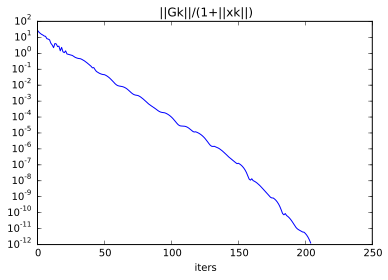

In [5]:
x = apg.solve(quad_grad, soft_thresh, np.zeros(n), use_restart=True, eps=1e-12, gen_plots=True)

iter num 0, norm(Gk)/(1+norm(xk)): nan, step-size: 8.42e-04
iter num 100, norm(Gk)/(1+norm(xk)): 1.85e-01, step-size: 1.78e-03
iter num 200, norm(Gk)/(1+norm(xk)): 3.34e-03, step-size: 4.83e-03
iter num 300, norm(Gk)/(1+norm(xk)): 1.61e-06, step-size: 2.92e-03
iter num 400, norm(Gk)/(1+norm(xk)): 6.36e-09, step-size: 7.90e-03
iter num 500, norm(Gk)/(1+norm(xk)): 3.14e-11, step-size: 4.93e-03
iter num 548, norm(Gk)/(1+norm(xk)): 9.89e-13, step-size: 7.95e-03
terminated


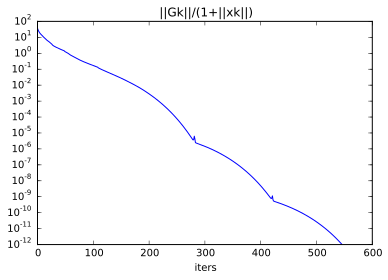

In [6]:
x_no_accleration = apg.solve(quad_grad, soft_thresh, np.zeros(n), use_gra=True, eps = 1e-12, gen_plots=True)

iter num 0, norm(Gk)/(1+norm(xk)): nan, step-size: 8.42e-04
iter num 100, norm(Gk)/(1+norm(xk)): 2.57e-02, step-size: 1.78e-03
iter num 200, norm(Gk)/(1+norm(xk)): 1.23e-03, step-size: 4.83e-03
iter num 300, norm(Gk)/(1+norm(xk)): 7.13e-05, step-size: 4.32e-03
iter num 400, norm(Gk)/(1+norm(xk)): 4.86e-06, step-size: 4.60e-03
iter num 500, norm(Gk)/(1+norm(xk)): 2.06e-07, step-size: 4.77e-03
iter num 600, norm(Gk)/(1+norm(xk)): 1.99e-08, step-size: 5.71e-03
iter num 700, norm(Gk)/(1+norm(xk)): 1.24e-09, step-size: 5.15e-03
iter num 800, norm(Gk)/(1+norm(xk)): 1.78e-10, step-size: 3.03e-03
iter num 896, norm(Gk)/(1+norm(xk)): 8.95e-13, step-size: 4.20e-03
terminated


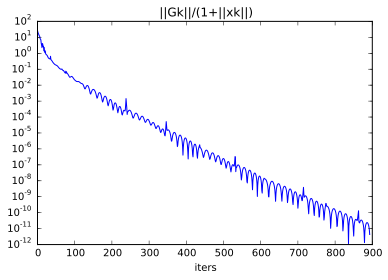

In [7]:
x_no_restart = apg.solve(quad_grad, soft_thresh, np.zeros(n), use_restart=False, eps=1e-12, gen_plots=True)

Compare to SCS (another first-order solver)

In [8]:
import cvxpy as cp

z = cp.Variable(n)
objective = cp.Minimize(0.5 * cp.sum_squares(A * z - b) + mu * cp.norm(z, 1))
p = cp.Problem(objective)
p.solve(verbose=True, solver=cp.SCS)

----------------------------------------------------------------------------
	SCS v1.1.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 104004
eps = 1.00e-03, alpha = 1.50, max_iters = 2500, normalize = 1, scale = 1.00
Variables n = 2002, constraints m = 2104
Cones:	linear vars: 2000
	soc vars: 104, soc blks: 2
Setup time: 5.46e-02s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0|      inf       inf       nan      -inf       inf       inf  4.30e-03 
   100| 8.02e-03  8.19e-03  1.26e-02  4.67e+01  4.79e+01  2.09e-14  1.30e-01 
   200| 5.70e-03  5.02e-03  1.46e-02  4.45e+01  4.59e+01  2.80e-14  2.59e-01 
   300| 5.56e-03  4.52e-03  1.49e-02  4.27e+01  4.40e+01  3

/Users/bodonoghue/.virtualenvs/sandbox/lib/python2.7/site-packages/pkg_resources/__init__.py:1250: UserWarning: /Users/bodonoghue/.python-eggs is writable by group/others and vulnerable to attack when used with get_resource_filename. Consider a more secure location (set with .set_extraction_path or the PYTHON_EGG_CACHE environment variable).
  warnings.warn(msg, UserWarning)


35.03459150120983

Relative error:

In [9]:
print(np.linalg.norm(x - z.value.A1) / np.linalg.norm(x))

0.0437069387711


Print outputs

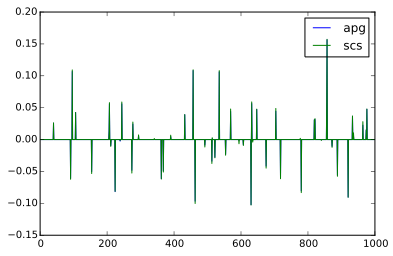

In [10]:
plt.plot(x, label='apg')
plt.plot(z.value.A1, label='scs')
plt.legend()